<a href="https://colab.research.google.com/github/Dhyeonle9/deep-learning-practice/blob/main/231206_dl_06_fashion_mnist_cnn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 29s 7ms/step - loss: 0.5033 - accuracy: 0.8157 - val_loss: 0.4244 - val_accuracy: 0.8522
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3272 - accuracy: 0.8813 - val_loss: 0.3253 - val_accuracy: 0.8793
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2790 - accuracy: 0.8986 - val_loss: 0.2958 - val_accuracy: 0.8918
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2489 - accuracy: 0.9089 - val_loss: 0.2887 - val_accuracy: 0.8963
Epoch 5/5
1/1 [==============================] - 0s 102ms/step


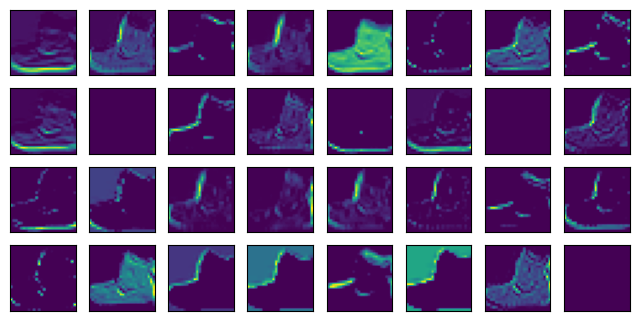

1/1 [==============================] - 0s 143ms/step


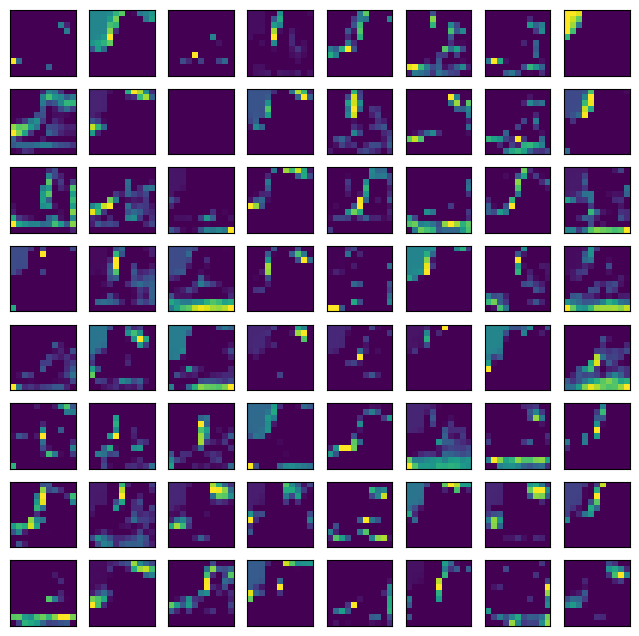

In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# CNN 모델 생성
model = models.Sequential([
    # 합성곱 레이어 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # 합성곱 레이어 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 합성곱 레이어 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # 완전 연결 레이어
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5,
                    validation_data=(test_images[..., np.newaxis], test_labels))

# 합성곱 및 풀링 레이어의 특징 시각화
def visualize_layer_activation(layer_name, img_index):
    layer_output = model.get_layer(layer_name).output
    activation_model = models.Model(inputs=model.input, outputs=layer_output)

    img = train_images[img_index].reshape(1, 28, 28, 1)
    activations = activation_model.predict(img)

    plt.figure(figsize=(8, 8))
    for i in range(activations.shape[-1]):
        plt.subplot(8, 8, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(activations[0, :, :, i], cmap='viridis')

    plt.show()

# 합성곱 레이어 1의 활성화 시각화
visualize_layer_activation('conv2d', 0)

# 합성곱 레이어 2의 활성화 시각화
visualize_layer_activation('conv2d_1', 0)

### CNN

In [2]:
# TensorFlow와 Keras를 임포트합니다
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.datasets import fashion_mnist
# Conv2D: 합성곱, MaxPooling2D: 최대값풀링

# - TensorFlow는 딥러닝을 위한 라이브러리로, 모델을 구축하고 학습하는 데 사용됩니다.
# - Keras는 딥러닝 모델을 쉽게 구축하고 관리하기 위한 고수준 인터페이스를 제공합니다.
# - Sequential 모델은 레이어를 선형으로 쌓아가는 간단한 딥러닝 모델을 만들 때 사용됩니다.
# - Dense, Conv2D, Flatten, MaxPooling2D, Dropout 등은 다양한 유형의 레이어를 정의하기 위한 도구입니다.
# - fashion_mnist 데이터셋은 의류 이미지 분류를 위한 데이터셋으로, 딥러닝 모델을 학습하기 위한 데이터를 제공합니다.

In [3]:
# Fashion MNIST 데이터셋을 로드합니다
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# - fashion_mnist.load_data() 함수를 사용하여 Fashion MNIST 데이터셋을 로드합니다.
# - 이 데이터셋은 의류와 패션 관련 이미지와 해당 레이블(옷 종류)로 구성되어 있습니다.
# - train_images와 test_images는 훈련 및 테스트 이미지 데이터를 저장하고, train_labels와 test_labels는 해당 이미지의 레이블을 저장합니다.
# - 훈련 데이터(train)는 모델을 학습하는 데 사용하고, 테스트 데이터(test)는 모델의 성능을 평가하는 데 사용됩니다.

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# 이미지의 차원을 조정합니다 (컨볼루션 층에 맞게)
train_images = train_images.reshape((60000, 28, 28, 1)) # 차원을 늘림(채널: 색상 값) 채널은 흑백 이미지인 경우 1, 컬러 이미지인 경우 3(R,G,B)
test_images = test_images.reshape((10000, 28, 28, 1))

# - 컨볼루션 층(Conv2D)에 입력되는 이미지의 형태를 맞추기 위해 차원을 조정합니다.
# - reshape() 함수를 사용하여 이미지의 형태를 (이미지 수, 높이, 너비, 채널)로 변경합니다.
# - 여기서 채널은 흑백 이미지인 경우 1, 컬러 이미지인 경우 3으로 설정됩니다.

In [6]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [7]:
# 이미지를 정규화합니다 (0과 1 사이의 값으로)
train_images, test_images = train_images / 255.0, test_images / 255.0

# - 이미지의 픽셀 값을 0과 1 사이의 값으로 정규화합니다.
# - 이것은 모델이 이미지의 픽셀 값을 이해하기 쉽게 만들어주고 학습을 안정화시킵니다.
# - 정규화는 각 픽셀 값을 255로 나누어서 수행합니다.

In [11]:
# 모델을 구축합니다
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 첫 번째 컨볼루션 층  Conv2D(출력, 커널사이즈:(3, 3), activation='relu', input_shape=(28, 28, 1)),

    MaxPooling2D((2,2)),                                              # 첫 번째 풀링 층
    Conv2D(64, (3, 3), activation='relu'),                           # 두 번째 컨볼루션 층
    MaxPooling2D((2,2)),                                                # 두 번째 풀링 층
    Flatten(), # Flatten 층
    Dense(64, activation='relu'), # Dense 층
    Dense(10, activation='softmax') # 출력 층
])
# - 모델을 Sequential 모델로 구축합니다. Sequential 모델은 레이어를 선형으로 쌓아가는 간단한 딥러닝 모델을 만들 때 사용됩니다.
# - Conv2D는 컨볼루션(합성곱) 층을 정의하는 레이어로, 이미지의 특징을 추출합니다.
# - MaxPooling2D는 최대 풀링 층을 정의하는 레이어로, 이미지의 크기를 줄이고 중요한 정보를 강조합니다.
# - Flatten은 이미지를 1차원 배열로 평탄화하는 레이어로, 모델의 입력 형태를 맞추기 위해 사용됩니다.
# - Dense는 완전 연결 레이어로, 신경망의 중간과 출력 층을 정의합니다.
# - activation 매개 변수는 각 레이어의 활성화 함수를 설정하며, 'relu'는 Rectified Linear Unit 함수를 의미하고, 'softmax'는 다중 클래스 분류를 위한 활성화 함수입니다.
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [12]:
# 모델 컴파일
model.compile(
    optimizer='adam',  # 옵티마이저: 'adam'은 효율적인 학습을 위한 알고리즘입니다.
    loss='sparse_categorical_crossentropy',  # 손실 함수: 다중 클래스 분류 문제에 사용되는 손실 함수입니다.
    metrics=['accuracy']  # 평가 지표: 정확도를 모델의 평가 지표로 사용합니다.
)

In [13]:
# 모델 학습
model.fit(
    train_images,                    # 훈련 이미지 데이터
    train_labels,                    # 훈련 레이블 데이터
    epochs=10,                       # 에폭 수: 전체 데이터셋을 몇 번 반복해서 학습할지 설정
    validation_data=(test_images, test_labels)  # 검증 데이터: 모델의 성능을 평가하기 위한 데이터
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4644 - accuracy: 0.8320 - val_loss: 0.3705 - val_accuracy: 0.8641
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3109 - accuracy: 0.8867 - val_loss: 0.3092 - val_accuracy: 0.8916
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2640 - accuracy: 0.9029 - val_loss: 0.2796 - val_accuracy: 0.9006
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2321 - accuracy: 0.9148 - val_loss: 0.2794 - val_accuracy: 0.8969
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2095 - accuracy: 0.9225 - val_loss: 0.2525 - val_accuracy: 0.9087
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1876 - accuracy: 0.9300 - val_loss: 0.2638 - val_accuracy: 0.9068
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1700 - accuracy: 0.9375 - val_loss: 0.2718 - val_accuracy

In [14]:
# 모델의 요약을 출력합니다
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [15]:
# 모델을 평가합니다
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# 테스트 정확도를 출력합니다
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2667 - accuracy: 0.9169 - 1s/epoch - 3ms/step

Test accuracy: 0.9168999791145325
